In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score , confusion_matrix


Data_frame = pd.read_csv(r"C:\Users\Ritesh\OneDrive\Documents\dielectron.csv")
Data_frame.head(5)



,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [2]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [3]:
Data_frame.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99915.000000
mean,147935.327230,4.957212e+08,36.436466,0.135897,0.182291,-1.508037,14.412167,-0.064095,0.021614,-0.00548,44.002901,-0.003984,0.124654,-1.590559,13.802036,-0.072830,0.021385,-0.004220,30.019521
std,920.306064,4.037703e+08,41.216203,13.404976,13.470281,51.603652,12.388740,1.462137,1.799562,0.99999,46.751132,13.127404,13.168867,61.430040,12.460549,1.738033,1.817031,0.999996,25.255847
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.00000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023970e+08,8.458595,-5.233675,-5.276248,-15.859825,3.771172,-1.283883,-1.527030,-1.00000,11.055725,-4.794770,-4.605965,-22.036950,3.738103,-1.892287,-1.556925,-1.000000,12.445200
50%,147929.000000,3.902759e+08,21.717000,0.141339,0.099092,-0.312987,12.967800,-0.061178,0.034324,-1.00000,25.264600,-0.035638,0.083665,-0.690244,11.690950,-0.135911,0.026986,-1.000000,21.283100
75%,149011.000000,6.338891e+08,50.003350,5.714560,5.648087,13.212650,20.018925,1.144408,1.562355,1.00000,66.925525,4.819540,5.061860,19.005825,19.596400,1.768253,1.596737,1.000000,39.025050
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.00000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


In [4]:
Data_frame.shape

(100000, 19)

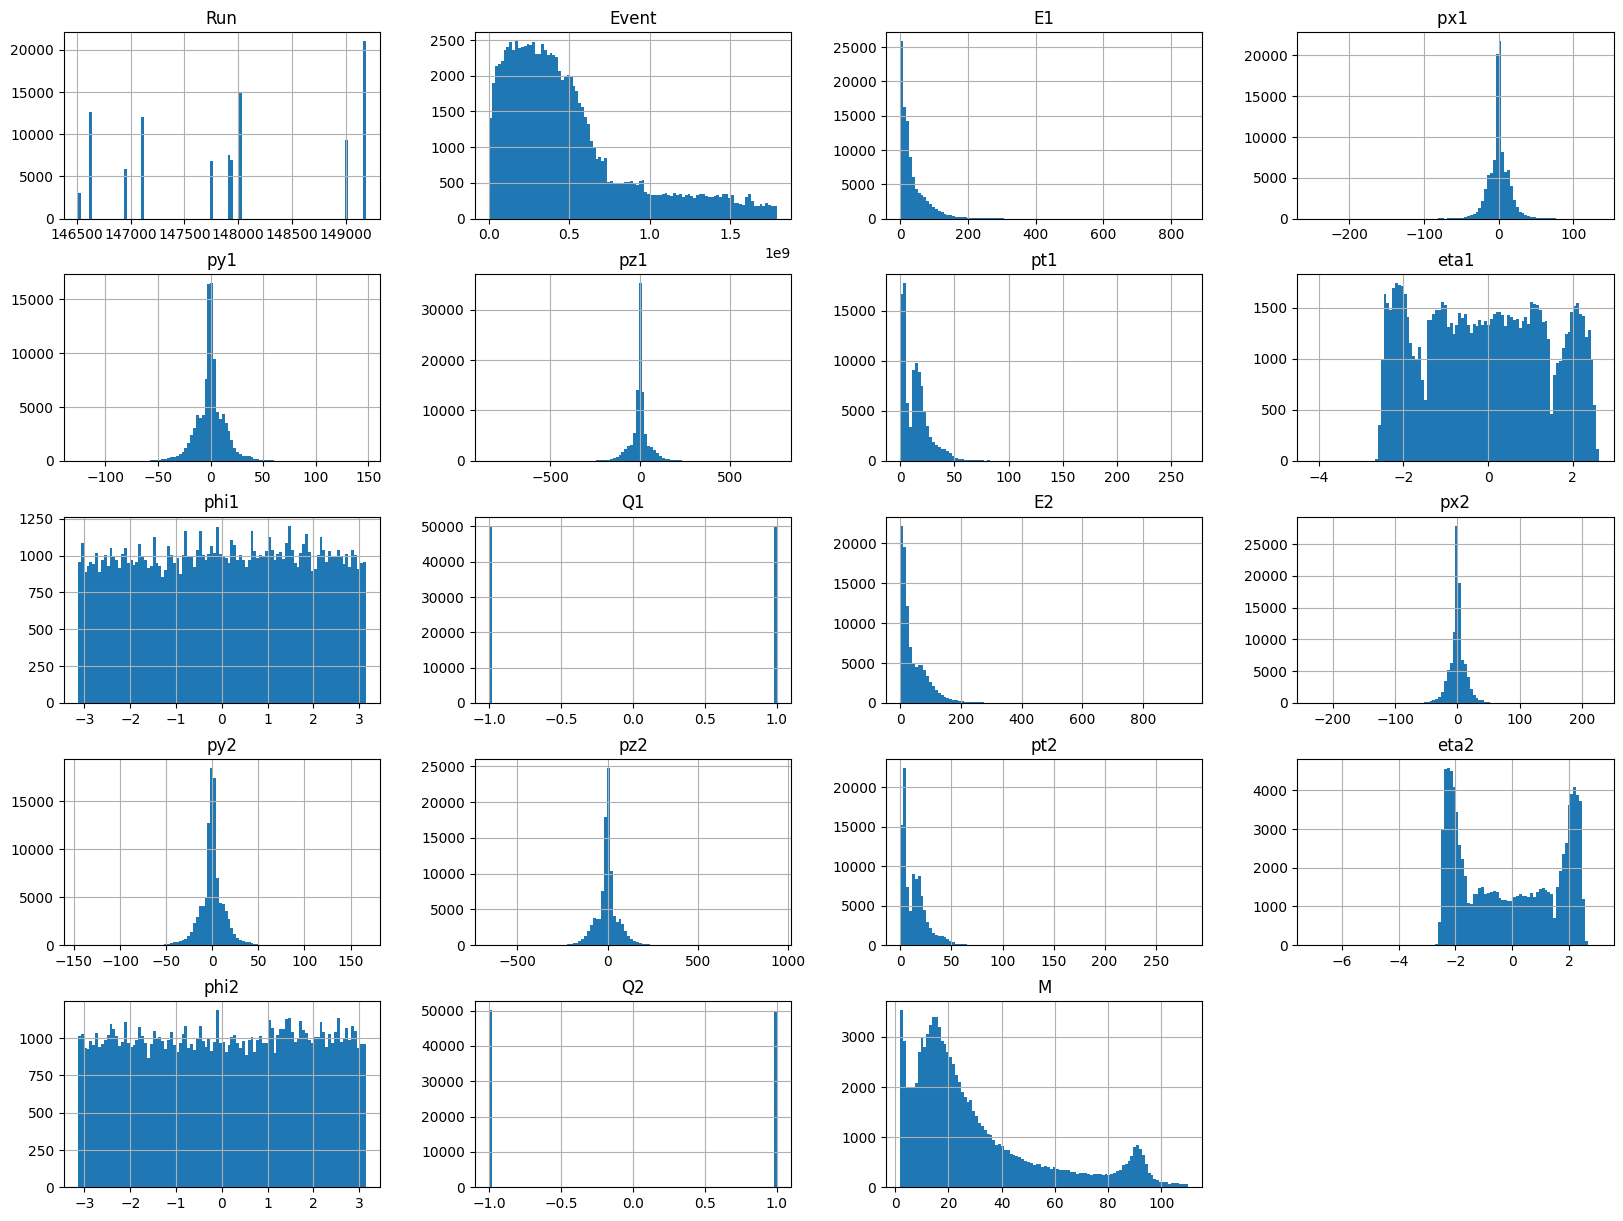

In [3]:
Data_frame.hist(bins = 100 , figsize = (20,15))
plt.show()

In [2]:
Data_frame['E_total'] = Data_frame['E1'] + Data_frame['E2']
Data_frame.head(5)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M,E_total
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841,69.99770
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300,23.76108
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770,41.36220
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862,90.52320
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718,75.33750


In [3]:
Data_frame.drop('Event' , axis=1 , inplace=True)
Data_frame.drop('Run' , axis=1 , inplace=True)

In [4]:
corr_matrix = Data_frame.corr()
print(corr_matrix['M'].sort_values(ascending=True))

py2       -0.011725
px2       -0.004419
phi2      -0.004145
Q2        -0.000444
phi1       0.001833
Q1         0.005624
px1        0.006112
py1        0.007538
pz1        0.011526
pz2        0.015702
eta1       0.017102
eta2       0.018772
E1         0.285231
E2         0.324660
pt1        0.437140
pt2        0.437158
E_total    0.469604
M          1.000000
Name: M, dtype: float64


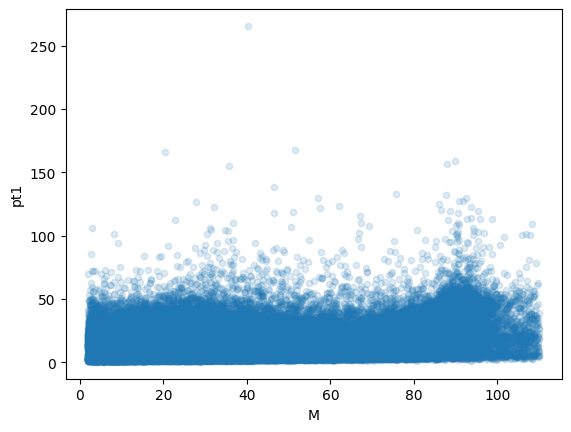

In [10]:
Data_frame.plot(kind='scatter' , x='M' , y='pt1' , alpha=0.15)
plt.show()

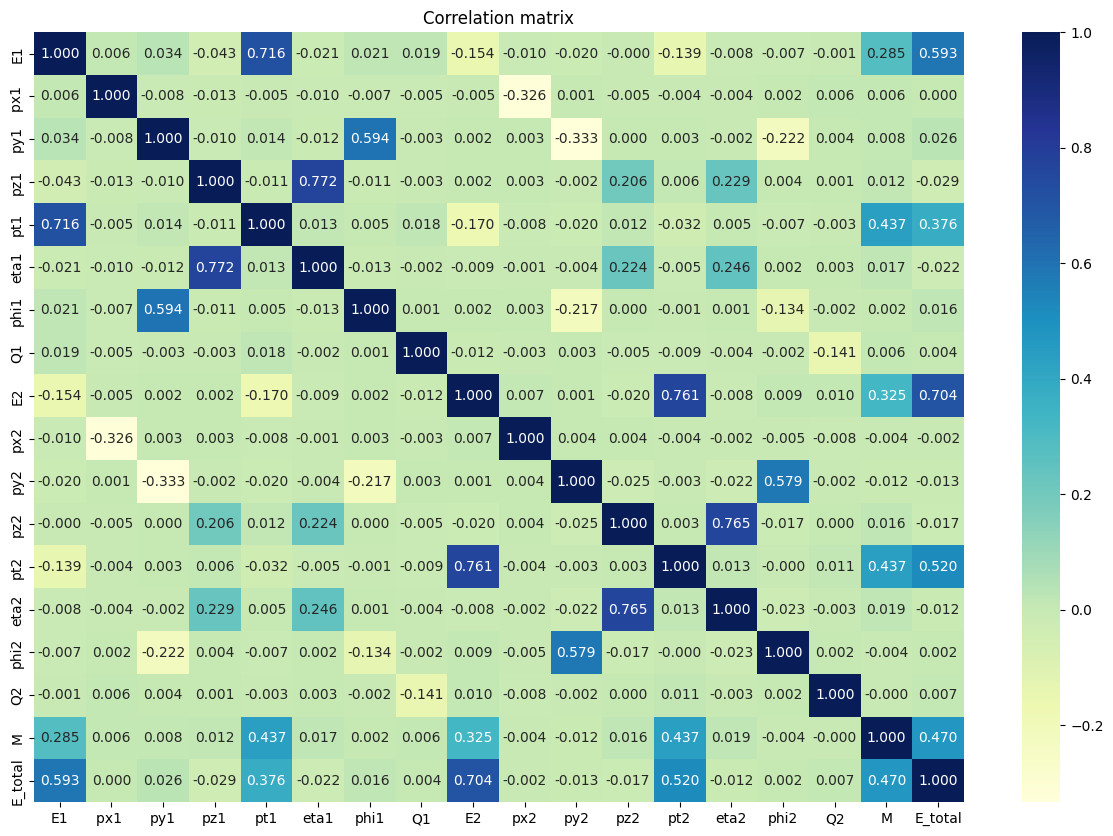

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix , annot=True , fmt='.3f' , cmap='YlGnBu')
plt.title('Correlation matrix')
plt.show()


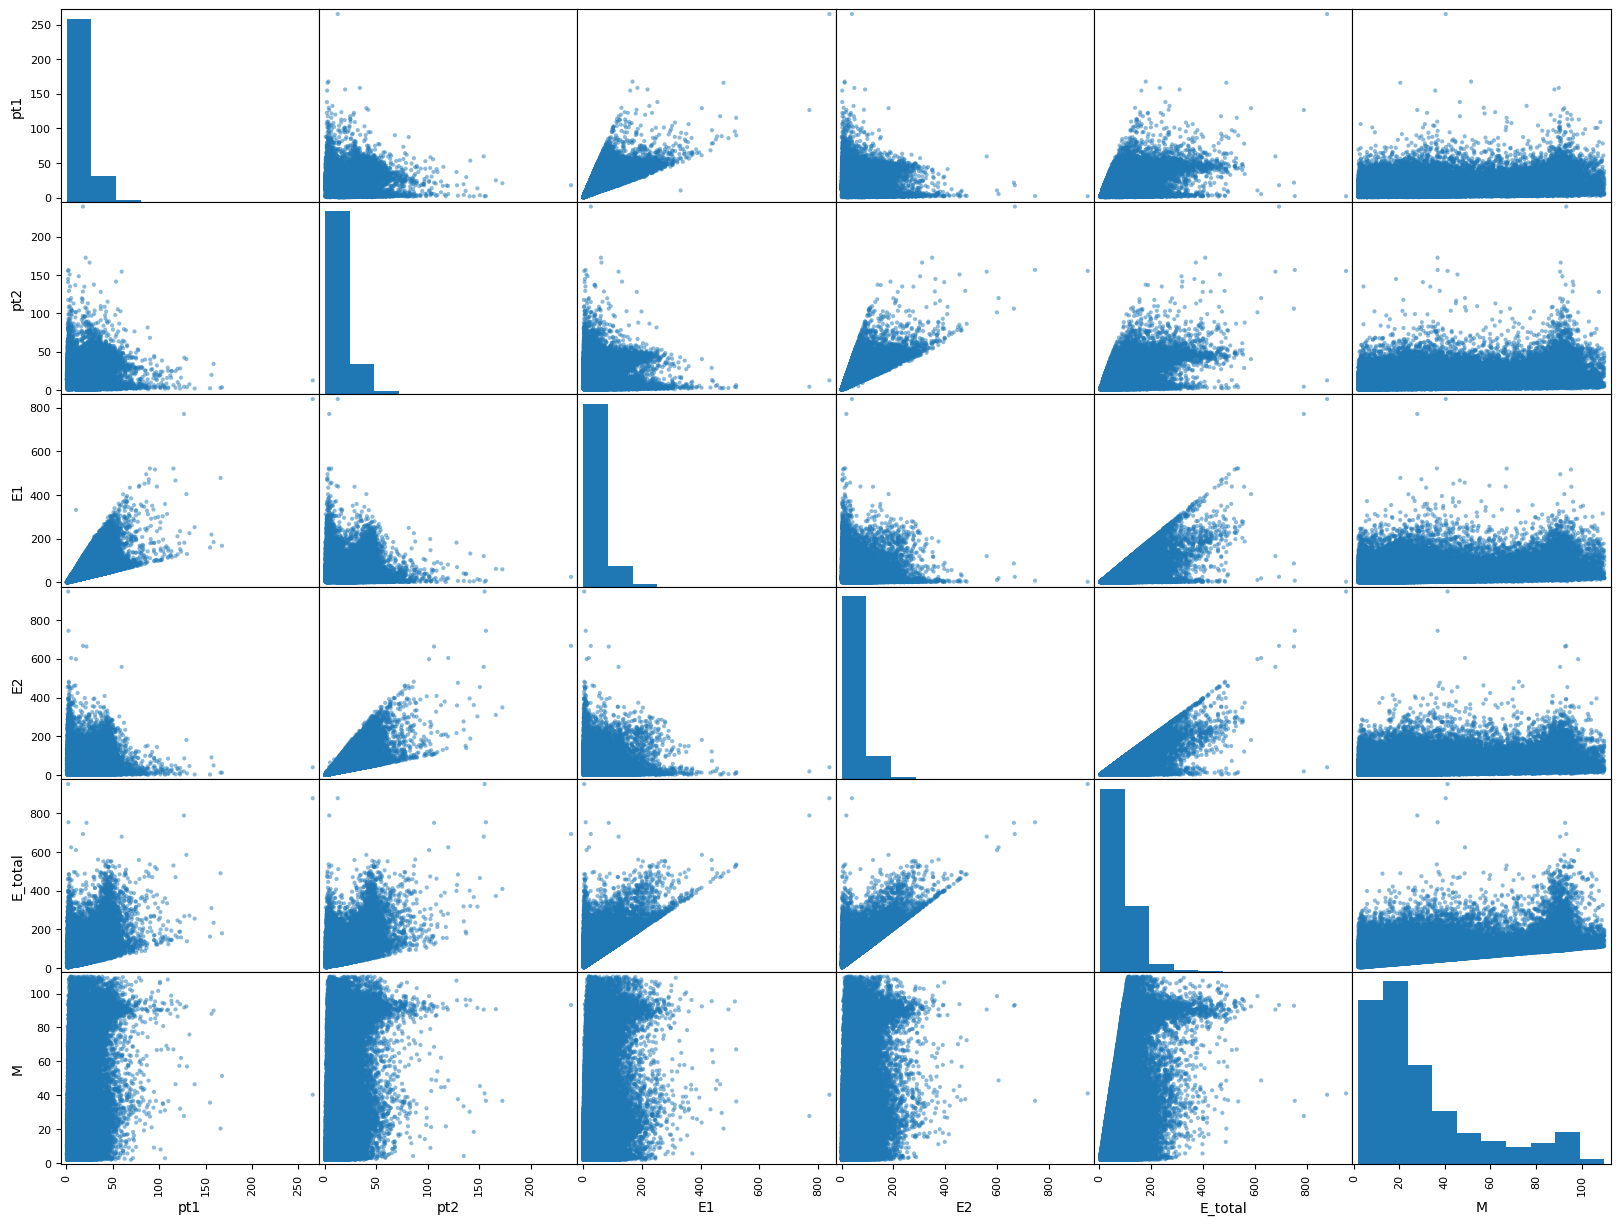

In [19]:
from pandas.plotting import scatter_matrix

attributes = ['pt1' , 'pt2' , 'E1' , 'E2' , 'E_total' , 'M']
scatter_matrix(train_set[attributes] , figsize = (20,15))
plt.show()

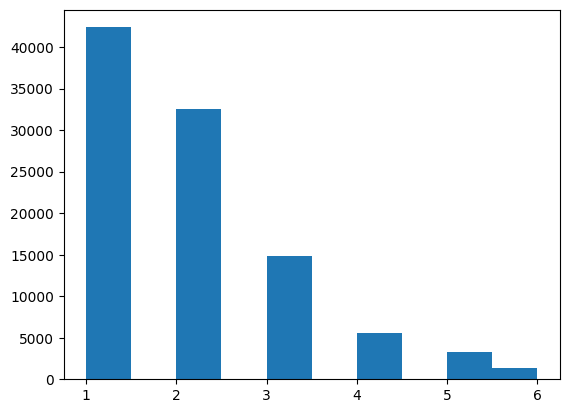

In [4]:
Data_frame['pt1_cat'] = pd.cut(Data_frame['pt1'], bins=[0, 10, 20, 30, 40, 50, np.inf], labels=[1, 2, 3, 4, 5, 6])                                        
plt.hist(Data_frame['pt1_cat'])
plt.show()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

str_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in str_split.split(Data_frame, Data_frame['pt1_cat']):
    train_set = Data_frame.loc[train_index]
    test_set = Data_frame.loc[test_index]
    
train_set

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M,E_total,pt1_cat
85135,21.31520,19.737900,4.124130,6.90962,20.16420,0.336293,0.205981,1,4.58671,4.359800,1.415600,0.161736,4.58386,0.035277,0.313954,-1,3.08465,25.90191,3
50551,23.03120,5.822130,-2.304340,22.16360,6.26157,1.976550,-0.376871,1,105.61000,-14.692000,20.326800,-102.589000,25.08060,-2.116400,2.196660,-1,98.37110,128.64120,1
52115,22.62480,-16.071300,-0.902092,-15.89910,16.09660,-0.872669,-3.085520,1,4.28738,2.667380,0.118486,-3.354490,2.67001,-1.051560,0.044391,1,13.16380,26.91218,2
11416,30.00990,-15.081600,-4.433940,25.56330,15.71990,1.262780,-2.855650,1,68.58690,16.368100,11.260200,-65.646400,19.86730,-1.910500,0.602584,-1,89.81320,98.59680,2
56678,23.82910,-9.505320,-21.245500,5.10949,23.27490,0.217802,-1.991490,1,6.77979,-2.639780,-3.492270,-5.176980,4.37771,-1.004770,-2.218060,1,13.32080,30.60889,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39706,3.45791,0.693350,-2.283960,2.50199,2.38689,0.915064,-1.276060,-1,74.63250,1.318020,12.972500,73.484600,13.03930,2.430040,1.469540,-1,14.34780,78.09041,1
65771,69.07080,2.067010,14.533900,67.49270,14.68010,2.230300,1.429520,1,5.62683,-2.291000,4.297170,2.819020,4.86974,0.550635,2.060600,1,16.77300,74.69763,2
92041,62.71090,-4.401830,-22.269600,58.45810,22.70050,1.674800,-1.765940,-1,9.43379,1.793980,-1.383670,9.157700,2.26560,2.104870,-0.656985,-1,8.16614,72.14469,3
50715,93.79200,-5.286150,-17.584800,91.97700,18.36220,2.314210,-1.862810,-1,7.67965,-2.098750,1.303320,7.271420,2.47050,1.800360,2.585880,-1,11.25260,101.47165,2


In [6]:
test_set


,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M,E_total,pt1_cat
24910,78.10790,-37.113000,-9.65071,68.046600,38.34720,1.337980,-2.887190,-1,46.6019,41.56060,10.41650,18.3291,42.84610,0.415711,0.245576,1,89.8411,124.70980,4
85914,34.48450,11.293000,32.30980,-4.210350,34.22650,-0.122706,1.234550,1,84.1383,-12.64950,-19.41690,80.8840,23.17380,1.963060,-2.148200,-1,89.5793,118.62280,4
69364,7.08909,-0.874683,1.89537,6.774780,2.08746,1.893340,2.003160,-1,73.8867,17.53220,9.79445,-71.1051,20.08250,-1.976830,0.509464,1,44.7724,80.97579,1
1540,19.01300,-14.122300,-9.86555,-8.045180,17.22700,-0.451513,-2.531820,1,25.5064,9.17226,3.31636,23.5680,9.75339,1.615720,0.346940,1,40.9100,44.51940,2
12789,99.25950,1.052030,25.20360,96.000600,25.22560,2.046470,1.529080,-1,18.1213,-1.31229,-3.31827,17.7665,3.56833,2.308300,-1.947390,-1,18.8748,117.38080,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47011,4.59288,3.504450,-2.96587,0.130239,4.59103,0.028364,-0.702351,1,88.6252,-16.40570,7.38901,86.7795,17.99290,2.277120,2.718410,1,30.8270,93.21808,1
98980,2.36277,0.056169,-2.27251,0.644359,2.27321,0.279793,-1.546080,-1,49.0737,7.86547,8.55936,47.6771,11.62450,2.119030,0.827619,-1,14.4387,51.43647,1
42482,5.32984,3.648110,-3.78024,0.899049,5.25347,0.170310,-0.803183,1,98.1838,-23.07860,-17.51760,-93.8114,28.97390,-1.891070,-2.492330,1,35.3728,103.51364,1
90120,2.46690,1.559680,-1.84895,0.484120,2.41893,0.198825,-0.870061,-1,35.4636,1.37048,-17.38800,-30.8779,17.44190,-1.335940,-1.492140,1,11.6745,37.93050,1


In [9]:
Data_frame


,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M,E_total,pt1_cat
0,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,11.28360,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810,-1,8.94841,69.99770,2
1,6.61188,-4.152130,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,-1,17.14920,-11.713500,5.04474,11.464700,12.75360,0.808077,2.734920,1,15.89300,23.76108,1
2,25.54190,-11.480900,2.041680,22.72460,11.66100,1.420480,2.965600,1,15.82030,-1.472800,2.25895,-15.588800,2.69667,-2.455080,2.148570,1,38.38770,41.36220,2
3,65.39590,7.512140,11.887100,63.86620,14.06190,2.218380,1.007210,1,25.12730,4.087860,2.59641,24.656300,4.84272,2.330210,0.565865,-1,3.72862,90.52320,2
4,61.45040,2.952840,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,-1,13.88710,-0.277757,-2.42560,-13.670800,2.44145,-2.423700,-1.684810,-1,2.74718,75.33750,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,-1,1.80181,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470,1,8.44779,14.11491,2
99996,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,1,14.69110,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960,1,20.71540,33.15530,2
99997,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,1,72.81740,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050,-1,12.71350,77.00306,1
99998,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,-1,8.58671,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610,1,4.69670,63.04891,2


In [7]:
for set in (train_set , test_set):
    set.drop('pt1_cat' , axis=1 , inplace=True)
    
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 85135 to 33832
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   E1       70000 non-null  float64
 1   px1      70000 non-null  float64
 2   py1      70000 non-null  float64
 3   pz1      70000 non-null  float64
 4   pt1      70000 non-null  float64
 5   eta1     70000 non-null  float64
 6   phi1     70000 non-null  float64
 7   Q1       70000 non-null  int64  
 8   E2       70000 non-null  float64
 9   px2      70000 non-null  float64
 10  py2      70000 non-null  float64
 11  pz2      70000 non-null  float64
 12  pt2      70000 non-null  float64
 13  eta2     70000 non-null  float64
 14  phi2     70000 non-null  float64
 15  Q2       70000 non-null  int64  
 16  M        69945 non-null  float64
 17  E_total  70000 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 10.1 MB


In [8]:
train_set2 = train_set.dropna(subset=['M'] , inplace=False)
train_set2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69945 entries, 85135 to 33832
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   E1       69945 non-null  float64
 1   px1      69945 non-null  float64
 2   py1      69945 non-null  float64
 3   pz1      69945 non-null  float64
 4   pt1      69945 non-null  float64
 5   eta1     69945 non-null  float64
 6   phi1     69945 non-null  float64
 7   Q1       69945 non-null  int64  
 8   E2       69945 non-null  float64
 9   px2      69945 non-null  float64
 10  py2      69945 non-null  float64
 11  pz2      69945 non-null  float64
 12  pt2      69945 non-null  float64
 13  eta2     69945 non-null  float64
 14  phi2     69945 non-null  float64
 15  Q2       69945 non-null  int64  
 16  M        69945 non-null  float64
 17  E_total  69945 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 10.1 MB


In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 85135 to 33832
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   E1       70000 non-null  float64
 1   px1      70000 non-null  float64
 2   py1      70000 non-null  float64
 3   pz1      70000 non-null  float64
 4   pt1      70000 non-null  float64
 5   eta1     70000 non-null  float64
 6   phi1     70000 non-null  float64
 7   Q1       70000 non-null  int64  
 8   E2       70000 non-null  float64
 9   px2      70000 non-null  float64
 10  py2      70000 non-null  float64
 11  pz2      70000 non-null  float64
 12  pt2      70000 non-null  float64
 13  eta2     70000 non-null  float64
 14  phi2     70000 non-null  float64
 15  Q2       70000 non-null  int64  
 16  M        69945 non-null  float64
 17  E_total  70000 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 10.1 MB


In [10]:
test_set2 = test_set.dropna(subset=['M'] , inplace=False)
test_set2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29970 entries, 24910 to 13758
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   E1       29970 non-null  float64
 1   px1      29970 non-null  float64
 2   py1      29970 non-null  float64
 3   pz1      29970 non-null  float64
 4   pt1      29970 non-null  float64
 5   eta1     29970 non-null  float64
 6   phi1     29970 non-null  float64
 7   Q1       29970 non-null  int64  
 8   E2       29970 non-null  float64
 9   px2      29970 non-null  float64
 10  py2      29970 non-null  float64
 11  pz2      29970 non-null  float64
 12  pt2      29970 non-null  float64
 13  eta2     29970 non-null  float64
 14  phi2     29970 non-null  float64
 15  Q2       29970 non-null  int64  
 16  M        29970 non-null  float64
 17  E_total  29970 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 4.3 MB


In [11]:
# Separate label data (output or the target variable that the ML model aims to predict)
# and predictors (input variables that provide information to the machine learning model)
# The goal of training a ML model is to learn a mapping from the predictors to the label data 
# so that the model can make accurate predictions on new, unseen data.

train_predictors = train_set2.drop('M' , axis=1 , inplace=False)
test_predictors = test_set2.drop('M' , axis=1 , inplace=False)
train_label = train_set2['M'].copy()
test_label = test_set2['M'].copy()

# Data preprocessing is done below

In [12]:
# Scaling the training dataframe(predictor) to have more precide training of the ML model
# StandardScaler() is used to perform standardization on the features,
# which means transforming the data so that it has a mean of 0 and a standard deviation of 1.
# cern_prepared will contain the scaled predictor data, which is now ready for use in training machine learning models
from sklearn.preprocessing import OneHotEncoder, StandardScaler

scale = StandardScaler()
cern_prepared = scale.fit_transform(train_predictors)
cern_test_prepared = scale.transform(test_predictors)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

cern_poly = PolynomialFeatures(2)
data_prepared = cern_poly.fit_transform(train_predictors)
data_test_prepared = cern_poly.transform(test_predictors)

# We will start with training and evaluation of Regression ML models
### 1st is Decision Tree Regressor on training set with predict()

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_regress = DecisionTreeRegressor(max_depth = 20)
tree_regress.fit(cern_prepared , train_label)


DecisionTreeRegressor(max_depth=20)

In [18]:
tree_train_pred = tree_regress.predict(cern_prepared)
tree_train_mse = mean_squared_error(tree_train_pred , train_label)
tree_train_rmse = np.sqrt(tree_train_mse)

print("Training set Decision Tree RMSE value : ",tree_train_rmse)
 

Training set Decision Tree RMSE value :  3.708608793376568


### evaluating using predict() on testing set

In [19]:
tree_reg = DecisionTreeRegressor(max_depth = 20)
tree_reg.fit(cern_test_prepared , test_label)

DecisionTreeRegressor(max_depth=20)

In [20]:
tree_test_pred = tree_reg.predict(cern_test_prepared)
tree_test_mse = mean_squared_error(tree_test_pred , test_label)

tree_test_rmse = np.sqrt(tree_test_mse)

print("Testing set Decision Tree RMSE value : ",tree_test_rmse)


Testing set Decision Tree RMSE value :  2.1896694601826177


## To check overfitting and underfitting we compare Training and Test Performance

In [21]:
difference = tree_train_rmse - tree_test_rmse
print("Difference between rmse values of training and testing sets is ",difference)


Difference between rmse values of training and testing sets is  1.5189393331939502


### Evaluating by Decision Tree Regressor on the training and testing set by Cross Validation

In [22]:
tree_train_mse = cross_val_score(tree_regress , cern_prepared , train_label , cv=10 , scoring='neg_mean_squared_error')
tree_test_mse = cross_val_score(tree_reg , cern_test_prepared , test_label , cv=10 , scoring='neg_mean_squared_error')

tree_train_rmse = np.sqrt(-tree_train_mse)
tree_test_rmse = np.sqrt(-tree_test_mse)

print("Training set Decision Tree RMSE values : " , tree_train_rmse)
print("Testing set Decision Tree RMSE values : ",tree_test_rmse)

Training set Decision Tree RMSE values :  [11.80370055 12.12597166 10.80977022 11.93770471 12.28878682 11.70627672
 11.88200883 10.776799   12.02438896 13.33482287]
Testing set Decision Tree RMSE values :  [15.24509399 14.14363501 12.1699177  11.14870235 11.49597141 11.84531595
 13.0598509  13.2538384  12.682137   13.14701967]


## To check overfitting and underfitting we compare Training and Test Performance

In [23]:
diff = tree_test_rmse - tree_train_rmse
print("Difference between rmse values of training and testing sets is ",diff)

Difference between rmse values of training and testing sets is  [ 3.44139344  2.01766336  1.36014748 -0.78900236 -0.79281541  0.13903923
  1.17784207  2.47703941  0.65774804 -0.1878032 ]


### Now we check our model performance by giving polynomial features as input in the dataset i.e. dataset is quadratic

In [24]:
tree_r = DecisionTreeRegressor(max_depth=20)
tree_r.fit(data_prepared , train_label)

DecisionTreeRegressor(max_depth=20)

In [25]:
tree_r_test = DecisionTreeRegressor(max_depth=20)
tree_r_test.fit(data_test_prepared , test_label)

DecisionTreeRegressor(max_depth=20)

In [26]:
tr_train_mse = cross_val_score(tree_r , data_prepared , train_label , cv=10 , scoring='neg_mean_squared_error')
tr_test_mse = cross_val_score(tree_r_test , data_test_prepared , test_label , cv=10 , scoring='neg_mean_squared_error')

tr_train_rmse = np.sqrt(-tr_train_mse)
tr_test_rmse = np.sqrt(-tr_test_mse)

print("Quadratic Training set Decision Tree RMSE values : " , tr_train_rmse)
print("Quadratic Testing set Decision Tree RMSE values : ",tr_test_rmse)

Quadratic Training set Decision Tree RMSE values :  [2.79081778 2.89976155 2.59446388 2.73231332 2.84426616 2.64006523
 2.82188374 2.71471331 3.11109927 2.83223321]
Quadratic Testing set Decision Tree RMSE values :  [2.98157714 3.33808067 3.68908875 3.08083052 2.81154509 3.20286215
 3.39017668 2.81875482 2.91895708 3.24949133]


In [27]:
diffe = tr_test_rmse - tr_train_rmse
print("Difference between rmse values of quadratic training and testing sets is ",diffe)

Difference between rmse values of quadratic training and testing sets is  [ 0.19075936  0.43831912  1.09462488  0.3485172  -0.03272107  0.56279692
  0.56829295  0.10404152 -0.19214219  0.41725812]


## This is Feature Importance Analysis with Decision Tree Regressor

Best Max Depth: 50
Best Tree RMSE: 12.438641197596349


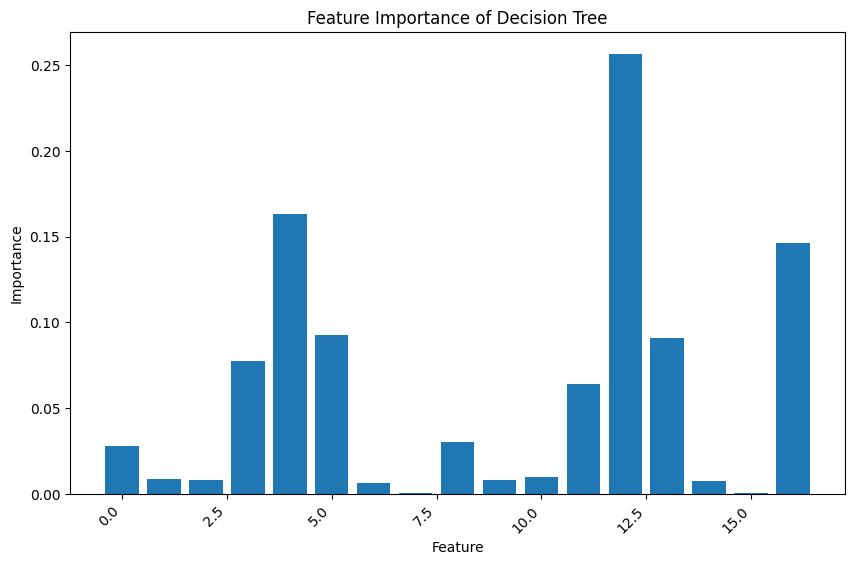

In [17]:
def train_and_evaluate_tree(X, y, max_depth):
    tree_regressor_feat = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_regressor_feat.fit(X, y)

    feature_importances = tree_regressor_feat.feature_importances_

    tree_mse_feat = cross_val_score(tree_regressor_feat, X, y, cv=5, scoring='neg_mean_squared_error')
    tree_rmse_feat = np.sqrt(-tree_mse_feat.mean())

    return tree_rmse_feat, feature_importances

max_depth_values = [None, 10, 15, 30, 50]

results = {'Max Depth': [], 'Tree RMSE': []}

for max_depth in max_depth_values:
    tree_rmse_feat, feature_importance = train_and_evaluate_tree(cern_prepared, train_label, max_depth)
    results['Max Depth'].append(max_depth)
    results['Tree RMSE'].append(tree_rmse_feat)

results_decisionTree = pd.DataFrame(results)

best_max_depth = 50

best_tree_rmse, best_feature_importances = train_and_evaluate_tree(cern_prepared, train_label, best_max_depth)

print(f"Best Max Depth: {best_max_depth}")
print(f"Best Tree RMSE: {best_tree_rmse}")

feature_importance_df = pd.DataFrame({'Feature': range(cern_prepared.shape[1]), 'Importance': best_feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance of Decision Tree')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2nd Random Forest Regressor on training set using predict()

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_regress = RandomForestRegressor(max_depth=20)
forest_regress.fit(cern_prepared , train_label)

RandomForestRegressor(max_depth=20)

In [31]:
forest_train_pred = forest_regress.predict(cern_prepared)
forest_train_mse = mean_squared_error(forest_train_pred , train_label)
forest_train_rmse = np.sqrt(forest_train_mse)

print("Training set Random Forest RMSE value : ",forest_train_rmse)


Training set Random Forest RMSE value :  3.0172850444995354


##  Random Forest Regressor on testing set using predict()


In [41]:
forest_reg = RandomForestRegressor(max_depth=20)
forest_reg.fit(cern_test_prepared , test_label)

RandomForestRegressor(max_depth=20)

In [33]:
forest_test_pred = forest_reg.predict(cern_test_prepared)
forest_test_mse = mean_squared_error(forest_test_pred , test_label)
forest_test_rmse = np.sqrt(forest_test_mse)

print("Testing set Random Forest RMSE value : ",forest_train_rmse)


Testing set Random Forest RMSE value :  3.0172850444995354


### To check overfitting and underfitting we compare Training and Test Performance

In [34]:
comparison = forest_test_rmse - forest_train_rmse
print("Difference between rmse values of training and testing sets is " , comparison)

Difference between rmse values of training and testing sets is  -0.054173085667992726


### Evaluating by Random Forest Regressor on the training and testing set by Cross Validation

In [35]:
forest_train_mse = cross_val_score(forest_regress , cern_prepared , train_label , cv=10 , scoring='neg_mean_squared_error')
forest_test_mse = cross_val_score(forest_reg , cern_test_prepared , test_label , cv=10 , scoring='neg_mean_squared_error')

forest_train_rmse = np.sqrt(-forest_train_mse)
forest_test_rmse = np.sqrt(-forest_test_mse)

forest_train_rmse
forest_test_rmse

array([6.93819298, 7.54883348, 7.4008953 , 7.13755219, 6.73751495,
       6.99558253, 6.49424745, 6.60728316, 6.70075838, 6.97067757])

In [36]:
compare = forest_test_rmse - forest_train_rmse
print("Difference between rmse values of training and testing sets via cross validation is \n" , compare)

Difference between rmse values of training and testing sets via cross validation is 
 [ 0.38480359  0.97084086  0.9367432   0.47441687  0.34089559  0.4866367
  0.20497556 -0.07249277  0.02793727  0.45491502]


## Now we will do feature importance analysis with Random Forest Regressor

Best Max Depth: 50
Best Forest RMSE: 6.40205542271687


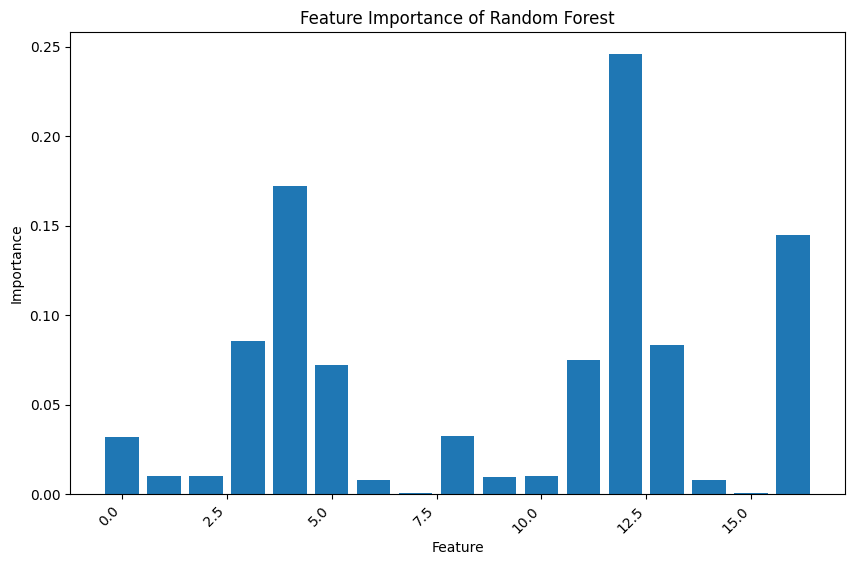

In [34]:
def train_and_evaluate_forest(X, y, max_depth):
    for_regressor_feat = RandomForestRegressor(max_depth=max_depth, random_state=42)
    for_regressor_feat.fit(X, y)

  
    feature_importances = for_regressor_feat.feature_importances_

    for_mse_feat = cross_val_score(for_regressor_feat, X, y, cv=5, scoring='neg_mean_squared_error')
    for_rmse_feat = np.sqrt(-for_mse_feat.mean())

    return for_rmse_feat, feature_importances


max_depth_values = [None, 10, 15, 30, 50]


results = {'Max Depth': [], 'Forest RMSE': []}


for max_depth in max_depth_values:
    for_rmse_feat, feature_importance = train_and_evaluate_forest(cern_prepared, train_label, max_depth)
    results['Max Depth'].append(max_depth)
    results['Forest RMSE'].append(for_rmse_feat)


results_decisionTree = pd.DataFrame(results)
best_max_depth = 50

best_tree_rmse, best_feature_importances = train_and_evaluate_forest(cern_prepared, train_label, best_max_depth)

print(f"Best Max Depth: {best_max_depth}")
print(f"Best Forest RMSE: {best_tree_rmse}")

feature_importance_df = pd.DataFrame({'Feature': range(cern_prepared.shape[1]), 'Importance': best_feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance of Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

# Now we will start Classification ML models
###  Use numpy's digitize to convert continuous values to discrete classes


In [14]:
bin_edges = [0, 1, 2, 3, 4, 5]  
bin_labels = [0, 1, 2, 3, 4]  

train_label_indices = np.digitize(train_label, bin_edges, right=True)
test_label_indices = np.digitize(test_label, bin_edges, right=True)

train_label_discrete = [bin_labels[i - 1] if i > 0 and i <= len(bin_labels) else 'Invalid' for i in train_label_indices]
test_label_discrete = [bin_labels[i - 1] if i > 0 and i <= len(bin_labels) else 'Invalid' for i in test_label_indices]



## Training and evaluation of the Classification ML models 
### 1st is KNN Classifier on training set by predict()


In [15]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(cern_prepared , train_label_discrete)

KNeighborsClassifier(n_neighbors=3)

In [18]:
knn_train_predictions = knn.predict(cern_prepared)
knn_train_accuracy = accuracy_score(train_label_discrete , knn_train_predictions)
knn_train_confusion_matrix = confusion_matrix(train_label_discrete , knn_train_predictions)


print("KNN Accuracy for training set : ", knn_train_accuracy)
print("KNN confusion matrix for training set : \n" , knn_train_confusion_matrix)


KNN Accuracy for training set :  0.9509900636214168
KNN confusion matrix for training set : 
 [[ 1810   181    43   176]
 [  656  1187    36   281]
 [  455   257   323   297]
 [  620   362    64 63197]]


### Now we check for testing set by predict()

In [26]:
knn_ag = KNeighborsClassifier(n_neighbors = 3)
knn_ag.fit(cern_test_prepared , test_label_discrete)

KNeighborsClassifier(n_neighbors=3)

In [20]:
knn_test_predictions = knn_ag.predict(cern_test_prepared)
knn_test_accuracy = accuracy_score(test_label_discrete , knn_test_predictions)
knn_test_confusion_matrix = confusion_matrix(test_label_discrete , knn_test_predictions)


print("KNN Accuracy for testing set : ", knn_test_accuracy)
print("KNN confusion matrix for testing set : \n" , knn_test_confusion_matrix)


KNN Accuracy for testing set :  0.9514514514514515
KNN confusion matrix for testing set : 
 [[  694    60    15   143]
 [  260   462     8   122]
 [  153   110   123   163]
 [  250   142    29 27236]]


#### To check overfitting and underfitting we compare Training and Test Performance¶

In [21]:
accuracy_difference = knn_train_accuracy - knn_test_accuracy
print("Difference between accuracy score of training and testing sets is " , accuracy_difference)

Difference between accuracy score of training and testing sets is  -0.0004613878300346874


### We evaluate the KNN model by using Cross Validation in both Training and Testing Dataset

In [27]:
knn_train_scores = cross_val_score(knn , cern_prepared , train_label_discrete , cv=10 , scoring='accuracy')
knn_test_scores = cross_val_score(knn_ag , cern_test_prepared , test_label_discrete , cv=10 , scoring='accuracy')

print("KNN Accuracy for training set : " , knn_train_scores)
print("KNN Accuracy for testing set : " , knn_test_scores)

KNN Accuracy for training set :  [0.91150822 0.91236598 0.91208006 0.91208006 0.91393853 0.91063769
 0.90935087 0.91192451 0.91492708 0.91235345]
KNN Accuracy for testing set :  [0.91658325 0.90990991 0.91224558 0.91224558 0.91758425 0.91324658
 0.91958625 0.91091091 0.91024358 0.91224558]


### To check overfitting and underfitting we compare Training and Test Performance¶

In [28]:
valid_difference = knn_test_scores - knn_train_scores
print("Difference between knn scores of training and testing sets is " , valid_difference)

Difference between knn scores of training and testing sets is  [ 0.00507503 -0.00245607  0.00016552  0.00016552  0.00364572  0.00260889
  0.01023538 -0.0010136  -0.0046835  -0.00010787]


## Feature Importance Analysis of KNN Classifier 

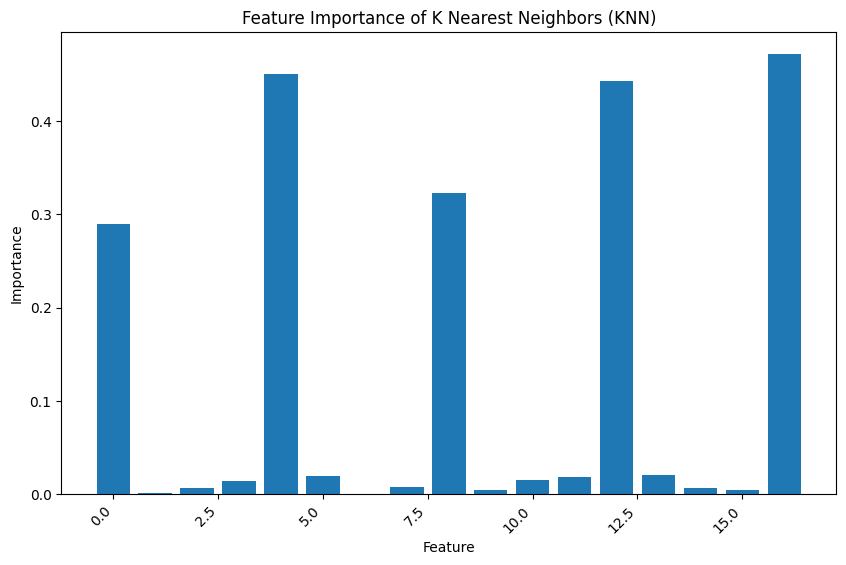

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance

def train_and_evaluate_knn(X, y, n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X, y)
    
    knn_predictions = knn.predict(X)
    knn_rmse = np.sqrt(mean_squared_error(y, knn_predictions))

    feature_importances = [np.abs(np.corrcoef(X[:, i], knn_predictions)[0, 1]) for i in range(X.shape[1])]
    
    return knn_rmse, feature_importances


n_neighbors_values = [3, 5, 7, 10]

knn_results = {'Neighbors': [], 'KNN RMSE': []}

for n_neighbors in n_neighbors_values:
    knn_rmse, feature_importances = train_and_evaluate_knn(cern_prepared, train_label, n_neighbors)
    knn_results['Neighbors'].append(n_neighbors)
    knn_results['KNN RMSE'].append(knn_rmse)

knn_results_df = pd.DataFrame(knn_results)


best_neighbors_index = knn_results_df['KNN RMSE'].idxmin()
best_neighbors_value = knn_results_df.loc[best_neighbors_index, 'Neighbors']
best_knn_rmse, best_feature_importances = train_and_evaluate_knn(cern_prepared, train_label, best_neighbors_value)

feature_importance_df_knn = pd.DataFrame({'Feature': range(cern_prepared.shape[1]), 'Importance': best_feature_importances})
feature_importance_df_knn = feature_importance_df_knn.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_knn['Feature'], feature_importance_df_knn['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance of K Nearest Neighbors (KNN)')
plt.xticks(rotation=45, ha='right')
plt.show()


# 2nd is SVC Classifier
### First training and evaluation on training set by predict()

In [35]:
from sklearn.svm import SVC

svc = SVC(kernel='linear' , C=1.0) 
svc.fit(cern_prepared , train_label_discrete)

SVC(kernel='linear')

In [36]:

svc_train_predictions = svc.predict(cern_prepared)
svc_train_accuracy = accuracy_score(train_label_discrete , svc_train_predictions)
svc_train_confusion_matrix = confusion_matrix(train_label_discrete , svc_train_predictions)

print("SVC Accuracy for training set :", svc_train_accuracy)
print("SVC Confusion matrix for training set : \n", svc_train_confusion_matrix)

SVC Accuracy for training set : 0.9184788047751805
SVC Confusion matrix for training set : 
 [[    0     0     0  2210]
 [    0     0     0  2160]
 [    0     0     0  1332]
 [    0     0     0 64243]]


### Now we check test set performance by predict()

In [37]:
svc_cg = SVC(kernel='linear' , C=1.0)
svc_cg.fit(cern_test_prepared , test_label_discrete)

SVC(kernel='linear')

In [38]:
svc_test_predictions = svc_cg.predict(cern_test_prepared)
svc_test_accuracy = accuracy_score(test_label_discrete , svc_test_predictions)
svc_test_confusion_matrix = confusion_matrix(test_label_discrete , svc_test_predictions)

print("SVC Accuracy for testing set :", svc_test_accuracy)
print("SVC Confusion matrix for testing set : \n", svc_test_confusion_matrix)

SVC Accuracy for testing set : 0.9228228228228228
SVC Confusion matrix for testing set : 
 [[    0     0     0   912]
 [    0     0     0   852]
 [    0     0     0   549]
 [    0     0     0 27657]]


#### Now we check overfitting or underfitting by comparing training and test performance

In [34]:
svc_accuracy_difference = svc_train_accuracy - svc_test_accuracy
print("Difference between accuracy score of training and testing sets is " , svc_accuracy_difference)

Difference between accuracy score of training and testing sets is  -0.004482257652605792


## We evaluate the KNN model by using Cross Validation in both Training and Testing Dataset

In [22]:
svc_train_scores = cross_val_score(svc , cern_prepared , train_label_discrete , cv=10 , scoring='accuracy')
svc_test_scores = cross_val_score(svc_cg , cern_test_prepared , test_label_discrete , cv=10 , scoring='accuracy')

print("KNN Accuracy for training set : " , svc_train_scores)
print("KNN Accuracy for testing set : " , svc_test_scores)

KNN Accuracy for training set :  [0.91851322 0.91851322 0.91851322 0.91837026 0.91837026 0.91850157
 0.91850157 0.91850157 0.91850157 0.91850157]
KNN Accuracy for testing set :  [0.92292292 0.92292292 0.92292292 0.92292292 0.92292292 0.92292292
 0.92292292 0.92258926 0.92258926 0.92258926]


In [24]:
svc_valid_difference = svc_test_scores - svc_train_scores
print("Difference between knn scores of training and testing sets is " , svc_valid_difference)

Difference between knn scores of training and testing sets is  [0.0044097  0.0044097  0.0044097  0.00455266 0.00455266 0.00442135
 0.00442135 0.00408768 0.00408768 0.00408768]


## Feature Importance Analysis of SVC Classifier

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_label_discrete_encoded = label_encoder.fit_transform(train_label_discrete)

def train_and_evaluate_svc(X, y, C):
    svc_feat = SVC(kernel='linear', C=C)
    svc_feat.fit(X, y)

    svc_mse_feat = cross_val_score(svc_feat, X, y, cv=5, scoring='neg_mean_squared_error')
    svc_rmse_feat = np.sqrt(-svc_mse_feat.mean())

    coefficients = np.abs(svc_feat.coef_.flatten())

    return svc_rmse_feat, coefficients

C_values = [0.1, 1.0, 10.0]

svc_results = {'C': [], 'SVC RMSE': [], 'Feature Importances': []}

for C_value in C_values:
    svc_rmse_feat, feature_importances = train_and_evaluate_svc(cern_prepared, train_label_discrete_encoded, C_value)
    svc_results['C'].append(C_value)
    svc_results['SVC RMSE'].append(svc_rmse_feat)
    svc_results['Feature Importances'].append(feature_importances)

svc_results_df = pd.DataFrame(svc_results)

svc_results_df = svc_results_df.dropna()

print("\nSupport Vector Regressor (SVR) Results:")
print(svc_results_df)

# ...

if not svc_results_df.empty:
    best_C_index = svc_results_df['SVC RMSE'].idxmin()
    best_C_value = svc_results_df.loc[best_C_index, 'C']
    best_svc_rmse, best_feature_importances = train_and_evaluate_svc(cern_prepared, train_label_discrete_encoded, best_C_value)

    if len(range(cern_prepared.shape[1])) == len(best_feature_importances):
        feature_importance_df_svc = pd.DataFrame({'Feature': range(cern_prepared.shape[1]), 'Importance': best_feature_importances})
        feature_importance_df_svc = feature_importance_df_svc.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        plt.bar(feature_importance_df_svc['Feature'], feature_importance_df_svc['Importance'])
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title('Feature Importance of Support Vector Regressor (SVR)')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    else:
        print("Error: 'Feature' and 'Importance' arrays have different lengths.")
else:
    print("DataFrame is empty. No results to display.")



Support Vector Regressor (SVR) Results:
      C  SVC RMSE                                Feature Importances
0   0.1  0.653403  [0.25950575823921085, 0.027068107380339157, 0....
1   1.0  0.653403  [0.2867704475167159, 0.024599077908682432, 0.1...
2  10.0  0.653403  [0.28967808754055113, 0.024371007399963673, 0....
Error: 'Feature' and 'Importance' arrays have different lengths.
